Customer Behavior Segmentation for Retail Optimization
You are working as a Data Scientist in an e-commerce company.
The company has collected detailed customer behavior data, including:
Annual Income
Spending Score
Purchase Frequency
Average Basket Value
Website Visit Time
Discount Usage Rate
Product Category Preferences
Return Rate
The dataset contains multiple numerical features, making it difficult to:
Visualize customer groups
Train clustering models efficiently
Understand key behavioral patterns
Dataset Name:
Customer Personality Analysis

🔹 Part 1 – Data Preparation
Load the dataset.
Select only numerical features relevant to customer behavior.
Handle missing values.
Standardize the data.

🔹 Part 2 – PCA Implementation
Apply PCA on the standardized dataset.
Plot the explained variance ratio.
Determine:
How many principal components are needed to retain at least 90% of total variance?
Reduce the dataset to those components.

🔹 Part 3 – Interpretation
Identify:
Which original features contribute most to PC1?
Which features dominate PC2?
Explain what PC1 and PC2 represent in business terms.

🔹 Part 4 – Practical Application
Visualize customers in 2D PCA space.
Now apply K-Means clustering on:
Original dataset
PCA-reduced dataset
Compare:
Silhouette score
Computation time
Cluster separation quality
 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
num_data=df.select_dtypes(include=['int64','float64'])
num_data.head()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [9]:
num_data=num_data.fillna(num_data.mean())
sc=StandardScaler()
x_scaled=sc.fit_transform(num_data)

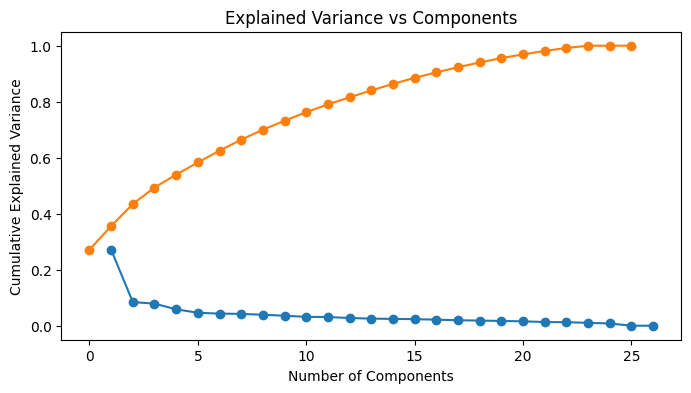

In [11]:
pca = PCA()
X_pca = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,4))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label='Individual')
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.show()


In [12]:
cumulative_variance = np.cumsum(explained_variance)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print("Components needed for 90% variance:", n_components_90)


Components needed for 90% variance: 17


In [13]:
pca_final = PCA(n_components=n_components_90)

X_reduced = pca_final.fit_transform(x_scaled)

X_reduced.shape


(2240, 17)

In [14]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=num_data.columns
)

loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
ID,-0.006029,-0.023432,-0.046112,-0.063004,-0.381048,0.539566,0.303728,0.668094,-0.092059,0.047652,...,-0.020460,-0.003340,0.040205,0.023931,-0.016371,-0.004843,0.005146,0.013426,-0.0,0.0
Year_Birth,-0.056589,-0.341177,0.032980,0.278577,0.409739,0.326806,0.049640,0.032722,0.181076,-0.354373,...,-0.080171,0.028047,-0.116713,0.106104,0.027499,-0.039314,-0.035710,0.024094,-0.0,0.0
Income,0.290892,0.070477,-0.026495,-0.136599,-0.075847,0.013293,-0.014945,-0.016033,-0.152634,-0.304611,...,0.596285,-0.061483,-0.214842,0.048037,-0.166921,0.523676,-0.017531,-0.088390,-0.0,0.0
Kidhome,-0.255124,-0.097000,0.081371,0.189496,0.176665,0.117058,0.122211,-0.056746,-0.284266,-0.078110,...,0.415477,-0.169465,0.126226,0.027629,0.352891,-0.304547,-0.034569,-0.056778,-0.0,0.0
Teenhome,-0.057478,0.540449,0.009839,-0.099478,-0.173588,-0.131336,-0.045581,0.036727,-0.085998,-0.011876,...,-0.154150,-0.005361,-0.208684,0.203041,0.296828,-0.184095,0.103082,-0.065063,-0.0,0.0


In [15]:
print("Top contributors to PC1:")
print(loadings['PC1'].sort_values(ascending=False).head())

print("\nTop contributors to PC2:")
print(loadings['PC2'].sort_values(ascending=False).head())


Top contributors to PC1:
NumCatalogPurchases    0.318628
MntMeatProducts        0.312443
MntWines               0.306426
Income                 0.290892
NumStorePurchases      0.282799
Name: PC1, dtype: float64

Top contributors to PC2:
Teenhome             0.540449
NumDealsPurchases    0.458994
NumWebPurchases      0.352781
NumStorePurchases    0.212635
NumWebVisitsMonth    0.160280
Name: PC2, dtype: float64


Visualize Customers in PCA Space

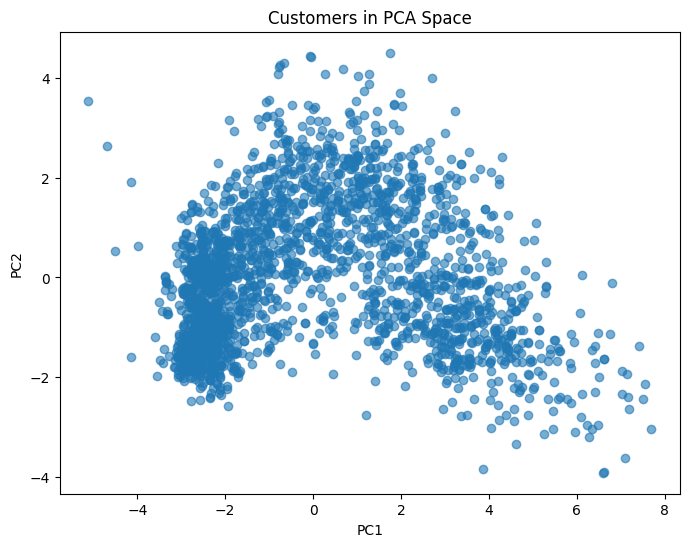

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_reduced[:,0],
    X_reduced[:,1],
    alpha=0.6
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in PCA Space")
plt.show()


K-Means on Original Dataset

In [17]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
start = time.time()

kmeans_original = KMeans(n_clusters=4, random_state=42)

labels_original = kmeans_original.fit_predict(x_scaled)

time_original = time.time() - start

sil_original = silhouette_score(x_scaled, labels_original)


K-Means on PCA Dataset

In [18]:
start = time.time()

kmeans_pca = KMeans(n_clusters=4, random_state=42)

labels_pca = kmeans_pca.fit_predict(X_reduced)

time_pca = time.time() - start

sil_pca = silhouette_score(X_reduced, labels_pca)


Compare Results

In [19]:
print("Original Data:")
print("Silhouette Score:", sil_original)
print("Computation Time:", time_original)

print("\nPCA Reduced Data:")
print("Silhouette Score:", sil_pca)
print("Computation Time:", time_pca)


Original Data:
Silhouette Score: 0.17985246915340528
Computation Time: 2.255988597869873

PCA Reduced Data:
Silhouette Score: 0.11056969544439628
Computation Time: 0.01937103271484375
